In [1]:
%matplotlib inline 
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 3.1 

### 3.1.1 a

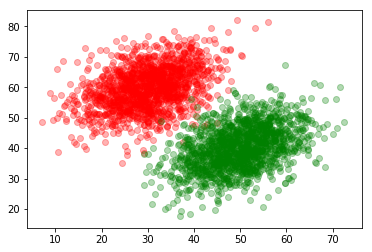

In [2]:
#generate two gaussian distributions
mean = [30, 60]
cov = [[50, 20], [20, 50]]  # covariance
x, y = np.random.multivariate_normal(mean, cov, 1500).T
plt.scatter(x, y, c = 'r', alpha = 0.3)
x1, y1= x, y

mean = [50, 40]
cov = [[50, 20], [20, 50]]  # covariance
x, y= np.random.multivariate_normal(mean, cov, 1500).T
x2, y2 = x, y
plt.scatter(x, y, c = 'g', alpha = 0.3)

(array([  2.,   2.,   2.,   3.,   3.,   2.,   6.,   9.,  15.,  14.,  11.,
         22.,  25.,  35.,  47.,  44.,  51.,  58.,  61.,  68.,  73.,  70.,
         71.,  79.,  88.,  70.,  57.,  73.,  50.,  62.,  67.,  49.,  52.,
         33.,  25.,  29.,  14.,  12.,  16.,  11.,   8.,   2.,   1.,   2.,
          0.,   1.,   0.,   4.,   0.,   1.]),
 array([  74.08875261,   76.3309563 ,   78.57316   ,   80.81536369,
          83.05756739,   85.29977108,   87.54197478,   89.78417847,
          92.02638216,   94.26858586,   96.51078955,   98.75299325,
         100.99519694,  103.23740064,  105.47960433,  107.72180802,
         109.96401172,  112.20621541,  114.44841911,  116.6906228 ,
         118.9328265 ,  121.17503019,  123.41723389,  125.65943758,
         127.90164127,  130.14384497,  132.38604866,  134.62825236,
         136.87045605,  139.11265975,  141.35486344,  143.59706713,
         145.83927083,  148.08147452,  150.32367822,  152.56588191,
         154.80808561,  157.0502893 ,  159.292

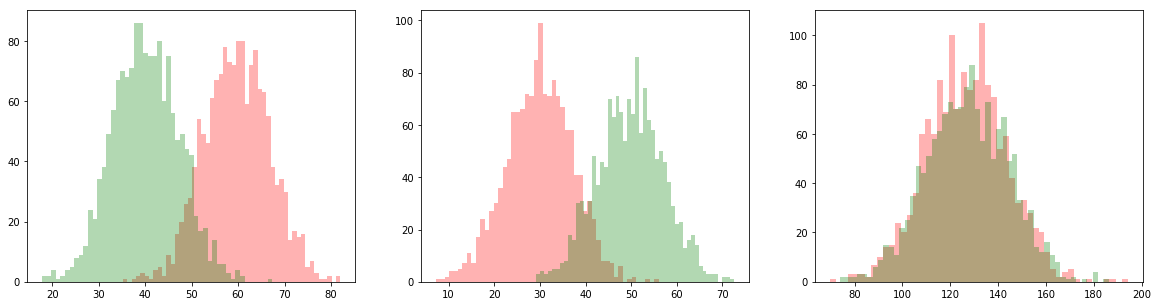

In [3]:
# project two ditributions
fig, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=3)
# w = (0 1)^T
ax[0].hist(y1, bins = 50,color = 'r', alpha = 0.3)
ax[0].hist(y2, bins = 50,color = 'g', alpha = 0.3)
# w = (1 0)^T
ax[1].hist(x1, bins = 50,color = 'r', alpha = 0.3)
ax[1].hist(x2, bins = 50,color = 'g', alpha = 0.3)
# w = (cos(pi/4) sin(pi/4))^T, in another word projection line is y = x
w = math.sqrt(2)
ax[2].hist((x1 + y1)*w, bins = 50, color = 'r', alpha = 0.3)
ax[2].hist((x2 + y2)*w, bins = 50, color = 'g', alpha = 0.3)

### 3.1.1  b

In [4]:
# define functions
def rotate(w1, w2, theta):
    w1_theta = math.cos(theta)*w1 - math.sin(theta)*w2
    w2_theta = math.sin(theta)*w1 + math.cos(theta)*w2
    w = np.mat([w1_theta, w2_theta]).T
    #print ('w is:', w)
    return w

def project_vector(w, x, y, n):
    x_project = []
    
    for i in range(n):
        #print (i)
        xi = x[i]
        yi = y[i]
        new_point = np.asarray(np.mat([xi, yi])*w*w.T)
        New_point = list(new_point)
        #print('newpoint is ',new_point, type(New_point))
        xn = float(new_point[:,0])
        yn = float(new_point[:,1])
        x_project.append((w[0]/w[1])xn + yn)  #revised
    return x_project

def mu_sigma(y, n):
    mu = np.sum(y)/n
    sigma = np.sum((y - mu)**2)/n
    return mu, sigma

def fisher_ratio(mu_a, sigma_a, mu_b, sigma_b, na, nb):
    numerator = (mu_a - mu_b)**2
    denominator = (na/(na + nb))*sigma_a + (nb/(na +nb))*sigma_b
    F = numerator/denominator
    return F

In [5]:
# I define w(0) = [1, 0]^T here
theta = np.linspace(0.,math.pi,180)
w1 = 1 
w2 = 0
F = []
na = len(x1)
nb = len(x2)

for i,theta_i in enumerate(theta):   
    w = rotate(w1, w2,theta_i)    
    x1_project = project_vector(w, x1, y1, na)
    x2_project = project_vector(w, x2, y2, nb)
    
    mu_a, sigma_a = mu_sigma(x1_project, na)
    mu_b, sigma_b = mu_sigma(x2_project, nb)
    F.append(fisher_ratio(mu_a, sigma_a,mu_b, sigma_b, na, nb))
    
#     print(w,'theta is:',theta_i)
#     print('mu_a is: ', mu_a, 'sigma_a is:', sigma_a)
#     print('mu_b is: ', mu_b, 'sigma_b is:', sigma_b)
#     print('fisher ratio is:', F[i])
#     print('---------------------------------------------------')

F_max = np.max(F)
place = np.where(F == np.max(F))
Theta = theta[place]
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print ('maximum fisher ratio is: ', F_max, ' when theat equals to:', Theta)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

# plot F ?????????

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
maximum fisher ratio is:  25.6797199017  when theat equals to: [ 2.35180679]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


### 3.1.2 a

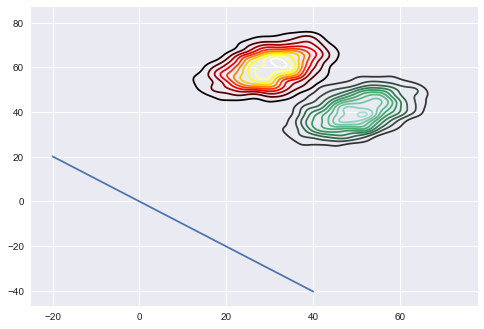

In [6]:
import seaborn as sns
#sns.set()
sns.set(color_codes=True)
sns.kdeplot(x1, y1,cmap='hot')
sns.kdeplot(x2, y2)
x_line = np.linspace(-20,40,600)
y_line = math.tan(Theta)*x_line
plt.plot(x_line,y_line)

### 3.1.2  b

AttributeError: 'list' object has no attribute 'astype'

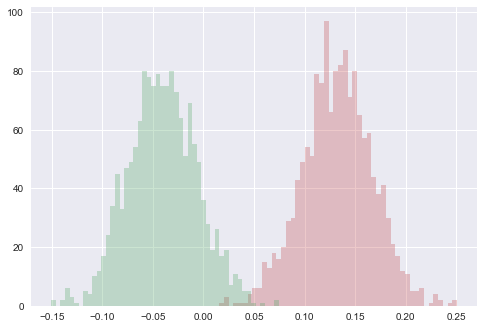

In [7]:
#use w from above, plot histogram of project 
w = rotate(w1, w2, Theta)
x1_project = project_vector(w, x1, y1, 1500)
x2_project = project_vector(w, x2, y2, 1500)
plt.hist(x1_project, bins = 50,color = 'r', alpha = 0.3)
plt.hist(x2_project, bins = 50,color = 'g', alpha = 0.3)
#sns.kdeplot(x1_project, color ='r') # kernel density estimator (kde)
#sns.kdeplot(x2_project, color ='g') # kde smooths histograms into pdfs



In [12]:
# take log ( ratio of probabilities of (y vs not-y) )
def logratio(a, b, eps=1e-14):  
    a=a+eps # to prevent taking logs of 0 or infinity
    b=b+eps # to prevent taking logs of 0 or infinity
    return np.log(a/b)

def sigmoid(x):
    return 1/(1+np.exp(-x))

# using hist find linspace limits ???
binedge = np.linspace(-0.15, 0.25, 50) 
mid = np.mean((binedge[1:]-binedge[:-1])/2) 
x_grid = binedge[:-1] + mid

x1hist = np.histogram(x1_project, bins=binedge, density="True")
x2hist = np.histogram(x2_project, bins=binedge, density="True")
x1_hist = x1hist[0]
x2_hist = x2hist[0]

print('x1_hist', x1_hist, 'x_grid', x_grid)
print(x1hist[1],x2hist[1])
print(binedge)


x1_hist [  0.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.
   0.16344229   0.16344229   0.08172115   0.24516344   0.81721147
   1.5527018    1.96130754   2.86024016   3.2688459    5.31187458
   6.94629753   7.84523015  11.44096064  11.84956638  11.35923949
  11.35923949  10.95063376   8.74416278   7.84523015   5.80220147
   4.6581054    3.1054036    1.87958639   0.73549033   0.57204803
   0.24516344   0.40860574   0.16344229   0.16344229] x_grid [-0.14591837 -0.1377551  -0.12959184 -0.12142857 -0.11326531 -0.10510204
 -0.09693878 -0.08877551 -0.08061224 -0.07244898 -0.06428571 -0.05612245
 -0.04795918 -0.03979592 -0.03163265 -0.02346939 -0.01530612 -0.00714286
  0.00102041  0.00918367  0.01734694  0.0255102   0.03367347  0.04183673
  0.05        0.05816327  0.06632653  0.0744898   0.08265306  0.090816

In [13]:
print(len(x_grid),len(lodds))


49 49


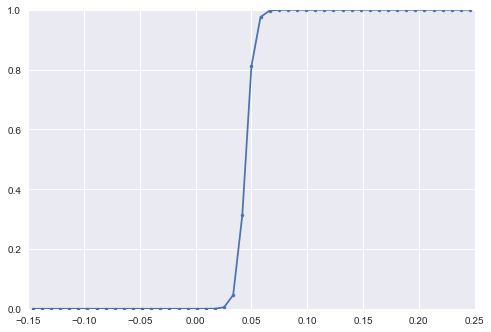

In [14]:
lodds=logratio(x1_hist, x2_hist, 1e-16) + \
        logratio(len(x1_project), len(x2_project))
lrfit=np.polyfit(x_grid, lodds, deg=1) # straight line fit

axes = plt.gca()
axes.set_xlim([-0.15,0.25])
axes.set_ylim([0,1])
plt.plot(x_grid,sigmoid(lrfit[0]*x_grid+lrfit[1]),'b.-')


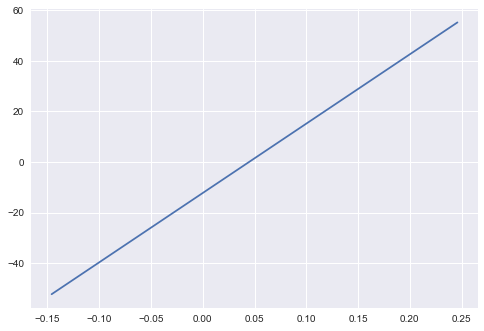

In [15]:
#plt.plot(x_grid,(lrfit[0]*x_grid + lrfit[1])) # lrfit[0] is the slope 

### 3.1.2 c

In [16]:
def unbalanced_fisher_ratio(mu_a, sigma_a, mu_b, sigma_b, na, nb):
    numerator = (mu_a - mu_b)**2
    denominator = sigma_a + sigma_b
    F_unbalanced = numerator/denominator
    return F_unbalanced
# repeat what we`ve done in 3.1 b

theta = np.linspace(0.,math.pi,180)
w1 = 1 
w2 = 0
F_unbalanced = []

for i,theta_i in enumerate(theta):   
    w = rotate(w1, w2,theta_i) 
    x1_project = project_vector(w, x1, y1, 1500)
    x2_project = project_vector(w, x2, y2, 1500)
    
    mu_a, sigma_a = mu_sigma(x1_project, 1500)
    mu_b, sigma_b = mu_sigma(x2_project, 1500)
    F_unbalanced.append(unbalanced_fisher_ratio(mu_a, sigma_a,mu_b, sigma_b, 1500, 1500))
    
#     print(w,'theta is:',theta_i,'i is: ', i)
#     print('mu_a is: ', mu_a, 'sigma_a is:', sigma_a)
#     print('mu_b is: ', mu_b, 'sigma_b is:', sigma_b)
#     print('fisher ratio is:', F_unbalanced[i])
#     print('---------------------------------------------------')

F_max = np.max(F_unbalanced)
place = np.where(F_unbalanced == np.max(F_unbalanced))
Theta = theta[place]
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print ('maximum unbalanced fisher ratio is: ', F_max, ' when theat equals to:', Theta)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

[[ 1.]
 [ 0.]] theta is: 0.0 i is:  0
mu_a is:  29.8964315719 sigma_a is: 51.4699552272
mu_b is:  49.7666973376 sigma_b is: 52.7130694185
fisher ratio is: 3.78974850214
---------------------------------------------------
[[ 0.99984599]
 [ 0.0175499 ]] theta is: 0.0175507969474 i is:  1
mu_a is:  31.4777886028 sigma_a is: 53.9872537351
mu_b is:  51.3412995827 sigma_b is: 55.3585507539
fisher ratio is: 3.60836037829
---------------------------------------------------
[[ 0.999384  ]
 [ 0.03509439]] theta is: 0.0351015938949 i is:  2
mu_a is:  33.0755567416 sigma_a is: 56.5482138059
mu_b is:  52.9080304211 sigma_b is: 58.0531984943
fisher ratio is: 3.43213058508
---------------------------------------------------
[[ 0.99861418]
 [ 0.05262807]] theta is: 0.0526523908423 i is:  3
mu_a is:  34.6877675454 sigma_a is: 59.1492803836
mu_b is:  54.4649596476 sigma_b is: 60.7932552466
fisher ratio is: 3.26103934181
---------------------------------------------------
[[ 0.99753677]
 [ 0.07014554]] t

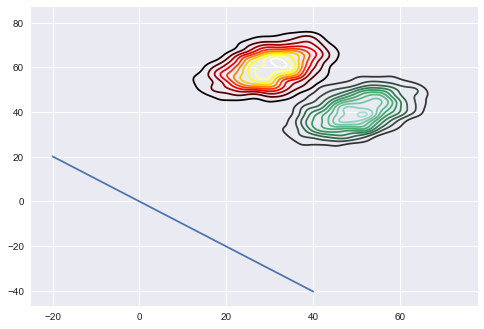

In [17]:
sns.set(color_codes=True)
sns.kdeplot(x1, y1,cmap='hot')
sns.kdeplot(x2, y2)
x_line = np.linspace(-20,40,600)
y_line = math.tan(Theta)*x_line
plt.plot(x_line,y_line)